### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

/Users/kapeleshh/.conda/envs/STS/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  after removing the cwd from sys.path.


### Load Data

In [2]:
filepath = "/Users/kapeleshh/PycharmProjects/STS/"
xls =  pd.ExcelFile(filepath + "data/dataset_JA_Clinical_STS.xls")
df = xls.parse(0)

In [3]:
df.columns = ['s1', 's2', 'score']

In [4]:
df.head()

,s1,s2,score
0,"口側の腸管は拡張し,暗赤色を呈していたが,壊死には陥っていなかった",標本造影では尾側膵管は嚢胞状に拡張していたが、明らかな乳頭状隆起像は描出されなかった,0
1,"これらの症例を報告するとともに,それぞれの臨床像について文献的考察を加え検討した",loss型の内耳性難聴であつた．本症例の報告とともに本症候群の難聴成因について文献的考察を行...,0
2,"また,左心耳内には輝度の低い血栓を疑う構造物を認めた","また,左心耳には輝度の低い血栓を疑う構造物を認めた",5
3,8)診断及び治療方針:診断は、下顎骨の過成長による骨格性反対咬合の症例で上顎前歯部の叢生を伴...,7)診断及び治療方針:下顎骨の過成長による骨格性反対咬合の症例で、上顎前歯部の叢生を伴うもの...,5
4,約3年前より左足底に皮疹出現し漸次拡大したため当科を受診した,約3年前より左足背に皮疹が出現し漸次拡大したため当科を受診した,3


### Value Counts

In [5]:
a = df.score.value_counts().reset_index()

<AxesSubplot:>

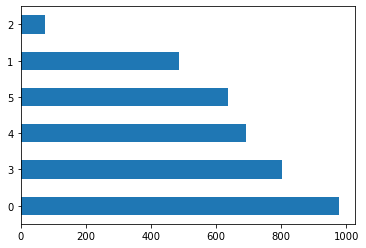

In [6]:
df.score.value_counts().plot(kind = 'barh')

In [7]:
from cleaning import *
df['s1'] = cleaning(df['s1'])
df['s2'] = cleaning(df['s2'])

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

In [8]:
df.head()

,s1,s2,score
0,口側の腸管は拡張し 暗赤色を呈していたが 壊死には陥っていなかった,標本造影では尾側膵管は嚢胞状に拡張していたが明らかな乳頭状隆起像は描出されなかった,0
1,これらの症例を報告するとともに それぞれの臨床像について文献的考察を加え検討した,loss型の内耳性難聴であつた．本症例の報告とともに本症候群の難聴成因について文献的考察を行...,0
2,また 左心耳内には輝度の低い血栓を疑う構造物を認めた,また 左心耳には輝度の低い血栓を疑う構造物を認めた,5
3,8 診断及び治療方針 診断は下顎骨の過成長による骨格性反対咬合の症例で上顎前歯部の叢生を伴うとした,7 診断及び治療方針 下顎骨の過成長による骨格性反対咬合の症例で上顎前歯部の叢生を伴うものと...,5
4,約3年前より左足底に皮疹出現し漸次拡大したため当科を受診した,約3年前より左足背に皮疹が出現し漸次拡大したため当科を受診した,3


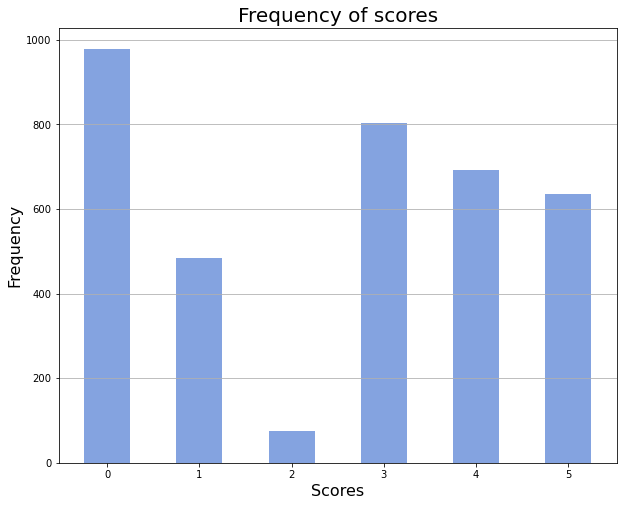

In [9]:
fig = plt.figure(figsize = (10, 8))
plt.bar(a['index'], a['score'], color=(0.2, 0.4, 0.8, 0.6), width = 0.5)
plt.title("Frequency of scores", fontsize = 20)
plt.xlabel("Scores", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.grid(axis='y')
plt.show()

In [10]:
df_score = df['score']
df = df.drop(['score'], axis=1)
df_s1 = df[['s1']]
df_s2 = df[['s2']]

## Word2Vec

In [13]:
from tokenizers import *
df_s1_sudachi = surface_sudachitokens(df_s1)

TypeError: expected str, bytes or os.PathLike object, not DataFrame